In [1]:
%load_ext autoreload
%autoreload 2
!pwd

/cse142L/cfiddle/tests


In [9]:
from notebook import *
build_one("test_src/test.cpp").asm("four")

four:
.LFB2703:
	.loc 10 45 12
	.cfi_startproc
	endbr64
	pushq	%rbp
	.cfi_def_cfa_offset 16
	.cfi_offset 6, -16
	movq	%rsp, %rbp
	.cfi_def_cfa_register 6
	.loc 10 46 9
	movl	$4, %eax
	.loc 10 47 1
	popq	%rbp
	.cfi_def_cfa 7, 8
	ret
	.cfi_endproc

In [10]:
from test_full_flow import test_maps_experiment
    
df= test_maps_experiment()


['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O0', 'BUILD=cfiddle/builds/OPTIMIZE_-O0_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/builds/OPTIMIZE_-O0_std_maps', 'clean', 'cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so']
rm -rf cfiddle/builds/OPTIMIZE_-O0_std_maps
g++ -c -Wall -Werror -g  -fPIC -O0 -I. -I/cse142L/cfiddle/src/cfiddle/resources/include    -MMD -save-temps=obj -std=gnu++11  test_src/std_maps.cpp -o cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.o
g++ cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.o   -L/cse142L/cfiddle/src/cfiddle/resources/include/../libcfiddle/ -lcfiddle   -shared -o cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so

['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O3', 'BUILD=cfiddle/builds/OPTIMIZE_-O3_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/buil

In [11]:
print(df)

   OPTIMIZE   function  count        ET
0       -O0    ordered      1  0.000003
1       -O0    ordered      2  0.000002
2       -O0    ordered      4  0.000005
3       -O0    ordered      8  0.000020
4       -O0    ordered     16  0.000021
5       -O0    ordered     32  0.000018
6       -O0    ordered     64  0.000025
7       -O0    ordered    128  0.000100
8       -O0    ordered    256  0.000103
9       -O0    ordered    512  0.000340
10      -O0  unordered      1  0.000007
11      -O0  unordered      2  0.000005
12      -O0  unordered      4  0.000017
13      -O0  unordered      8  0.000011
14      -O0  unordered     16  0.000017
15      -O0  unordered     32  0.000015
16      -O0  unordered     64  0.000075
17      -O0  unordered    128  0.000047
18      -O0  unordered    256  0.000109
19      -O0  unordered    512  0.000164
20      -O3    ordered      1  0.000001
21      -O3    ordered      2  0.000002
22      -O3    ordered      4  0.000001
23      -O3    ordered      8  0.000004


OPTIMIZE       -O0                 -O3          
function   ordered unordered   ordered unordered
count                                           
256       0.000189  0.000202  0.000046  0.000036
512       0.000277  0.000235  0.000064  0.000077
1024      0.000562  0.000426  0.000088  0.000132
2048      0.001186  0.000688  0.000213  0.000176
4096      0.002542  0.001288  0.000369  0.000292
8192      0.005017  0.002487  0.000626  0.000774
16384     0.009570  0.005336  0.001261  0.001210
32768     0.020538  0.013004  0.002414  0.002239
65536     0.043364  0.021367  0.004799  0.004098
131072    0.090022  0.047770  0.010747  0.008724
262144    0.192008  0.084705  0.025451  0.017014
524288    0.401374  0.155035  0.064922  0.034399
1048576   0.851074  0.307454  0.154733  0.068651
2097152   1.869860  0.615364  0.364471  0.136929
4194304   3.852420  1.254090  0.847968  0.273873
8388608   8.153580  2.507010  1.878860  0.556393

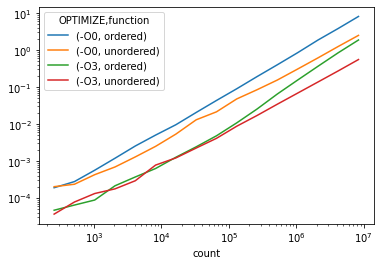

In [6]:
from cfiddle import *
import pandas as pd
import numpy as np

builds = build(code(r"""
#include<set>
#include<unordered_set>
#include"cfiddle.hpp"

extern "C"
int ordered(int count) {
    start_measurement();
    std::set<int> t;
    for (int i = 0; i < count; i++) {
        t.insert(i);
    }
    end_measurement();
    return t.size();
}

extern "C"
int unordered(int count) {
    start_measurement();
    std::unordered_set<int> t;
    for (int i = 0; i < count; i++) {
        t.insert(i);
    }
    end_measurement();
    return t.size();
}
"""), parameters=arg_map(OPTIMIZE=["-O0", "-O3"]))
results = run(invocations=product(builds, ["ordered", "unordered"], arg_map(count=2**np.arange(8, 24))))
df = results.as_df()

pt = pd.pivot_table(df, values="ET", index=["count"], columns=["OPTIMIZE","function"], aggfunc=np.sum)
pt.plot.line(loglog=True)
display(pt)

['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O0', 'BUILD=cfiddle/builds/OPTIMIZE_-O0_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/builds/OPTIMIZE_-O0_std_maps', 'cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so']
make: 'cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so' is up to date.



,OPTIMIZE,function,count,ET
0,-O0,ordered,1,13.4753
1,-O0,ordered,2,13.4800
2,-O0,ordered,4,13.4846
3,-O0,ordered,8,13.4913
4,-O0,ordered,16,13.4966
5,-O0,ordered,32,13.5003
6,-O0,ordered,64,13.5038
7,-O0,ordered,128,13.5072
8,-O0,ordered,256,13.5114
9,-O0,ordered,512,13.5160


['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O0', 'BUILD=cfiddle/builds/OPTIMIZE_-O0_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/builds/OPTIMIZE_-O0_std_maps', 'cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so']
make: 'cfiddle/builds/OPTIMIZE_-O0_std_maps/std_maps.so' is up to date.



,OPTIMIZE,function,count,ET
0,-O0,unordered,1,14.6142
1,-O0,unordered,2,14.6182
2,-O0,unordered,4,14.6228
3,-O0,unordered,8,14.6281
4,-O0,unordered,16,14.6338
5,-O0,unordered,32,14.6396
6,-O0,unordered,64,14.6453
7,-O0,unordered,128,14.6504
8,-O0,unordered,256,14.6571
9,-O0,unordered,512,14.6623


['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O3', 'BUILD=cfiddle/builds/OPTIMIZE_-O3_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/builds/OPTIMIZE_-O3_std_maps', 'cfiddle/builds/OPTIMIZE_-O3_std_maps/std_maps.so']
make: 'cfiddle/builds/OPTIMIZE_-O3_std_maps/std_maps.so' is up to date.



,OPTIMIZE,function,count,ET
0,-O3,ordered,1,15.3986
1,-O3,ordered,2,15.4053
2,-O3,ordered,4,15.4103
3,-O3,ordered,8,15.4148
4,-O3,ordered,16,15.4192
5,-O3,ordered,32,15.4245
6,-O3,ordered,64,15.4305
7,-O3,ordered,128,15.4367
8,-O3,ordered,256,15.4428
9,-O3,ordered,512,15.4487


['make', '-f', '/cse142L/cfiddle/src/cfiddle/resources/make/cfiddle.make', 'OPTIMIZE=-O3', 'BUILD=cfiddle/builds/OPTIMIZE_-O3_std_maps', 'CFIDDLE_INCLUDE=/cse142L/cfiddle/src/cfiddle/resources/include', 'CFIDDLE_VPATH=test_src:cfiddle/builds/OPTIMIZE_-O3_std_maps', 'cfiddle/builds/OPTIMIZE_-O3_std_maps/std_maps.so']
make: 'cfiddle/builds/OPTIMIZE_-O3_std_maps/std_maps.so' is up to date.



,OPTIMIZE,function,count,ET
0,-O3,unordered,1,15.9517
1,-O3,unordered,2,15.9566
2,-O3,unordered,4,15.9614
3,-O3,unordered,8,15.9657
4,-O3,unordered,16,15.9692
5,-O3,unordered,32,15.9730
6,-O3,unordered,64,15.9767
7,-O3,unordered,128,15.9809
8,-O3,unordered,256,15.9875
9,-O3,unordered,512,15.9960


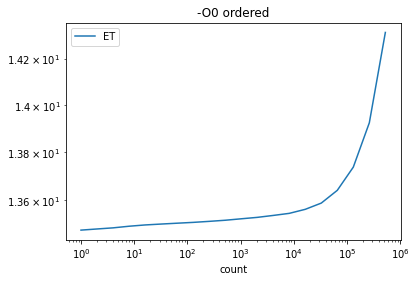

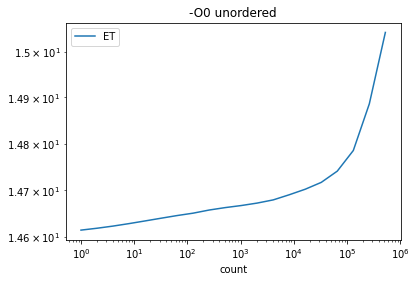

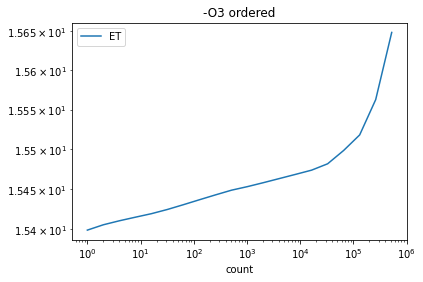

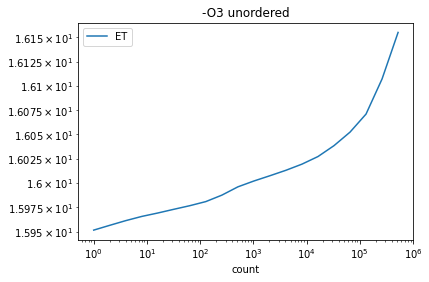

In [38]:
from cfiddle.util import expand_args
from cfiddle.LocalRunner import run
from cfiddle.MakeBuilder import build
import os

for OPTIMIZE in ["-O0", "-O3"]:
    for function in ["ordered", "unordered"]:
        builds = build("test_src/std_maps.cpp", OPTIMIZE=[OPTIMIZE])
        results = run(build=[builds],
                      function=[function],
                      arguments=expand_args(count=map(lambda x: 2**x, range(0, 20))))
        df = results.as_df()
        df["count"] = df["count"].astype(int)
        df["ET"] = df["ET"].astype(float)
        df.plot.line(x="count", y="ET", title=f"{OPTIMIZE} {function}", loglog=True)
